<a href="https://colab.research.google.com/github/deviarati18/Cotton-leaf-disease-prediction---EDA/blob/main/DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_path = '/content/drive/MyDrive/disease/train'
valid_path = '/content/drive/MyDrive/disease/test'

In [72]:
from glob import glob
import keras
import random
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import cv2
import plotly.express as px
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
#bokeh
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import Spectral6

In [5]:
data_sample_path = Path('/content/drive/MyDrive/disease/train')
data_JPG = list(data_sample_path.glob(r"*/*.jpg"))
data_label = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],data_JPG))
data_JPG_Series = pd.Series(data_JPG,name="JPG").astype(str)
data_Labels_Series = pd.Series(data_label,name="CATEGORY")
Data = pd.concat([data_JPG_Series,data_Labels_Series],axis=1)

In [6]:
data_sample_path_val = Path('/content/drive/MyDrive/disease/test')
data_JPG_val = list(data_sample_path_val.glob(r"*/*.jpg"))
data_label_val = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],data_JPG_val))
data_JPG_Series_val = pd.Series(data_JPG_val,name="JPG").astype(str)
data_Labels_Series_val = pd.Series(data_label_val,name="CATEGORY")
Data_val = pd.concat([data_JPG_Series_val,data_Labels_Series_val],axis=1)

In [7]:
Data

JPG        CATEGORY
0     /content/drive/MyDrive/disease/train/Target sp...     Target spot
1     /content/drive/MyDrive/disease/train/Target sp...     Target spot
2     /content/drive/MyDrive/disease/train/Target sp...     Target spot
3     /content/drive/MyDrive/disease/train/Target sp...     Target spot
4     /content/drive/MyDrive/disease/train/Target sp...     Target spot
...                                                 ...             ...
2375  /content/drive/MyDrive/disease/train/Powdery M...  Powdery Mildew
2376  /content/drive/MyDrive/disease/train/Powdery M...  Powdery Mildew
2377  /content/drive/MyDrive/disease/train/Powdery M...  Powdery Mildew
2378  /content/drive/MyDrive/disease/train/Powdery M...  Powdery Mildew
2379  /content/drive/MyDrive/disease/train/Powdery M...  Powdery Mildew

[2380 rows x 2 columns]

In [8]:
Data_val

JPG          CATEGORY
0    /content/drive/MyDrive/disease/test/Bacterial ...  Bacterial Blight
1    /content/drive/MyDrive/disease/test/Bacterial ...  Bacterial Blight
2    /content/drive/MyDrive/disease/test/Bacterial ...  Bacterial Blight
3    /content/drive/MyDrive/disease/test/Bacterial ...  Bacterial Blight
4    /content/drive/MyDrive/disease/test/Bacterial ...  Bacterial Blight
..                                                 ...               ...
229  /content/drive/MyDrive/disease/test/Aphids/18.jpg            Aphids
230   /content/drive/MyDrive/disease/test/Aphids/8.jpg            Aphids
231  /content/drive/MyDrive/disease/test/Aphids/28.jpg            Aphids
232  /content/drive/MyDrive/disease/test/Aphids/14.jpg            Aphids
233  /content/drive/MyDrive/disease/test/Aphids/33.jpg            Aphids

[234 rows x 2 columns]

In [9]:
for i in tqdm(range(len(Data))):
  Data["JPG"][i] = Image.open(Data["JPG"][i])
  

100%|██████████| 2380/2380 [06:32<00:00,  6.06it/s]


In [10]:
for i in tqdm(range(len(Data_val))):
  Data_val["JPG"][i] = Image.open(Data_val["JPG"][i])

100%|██████████| 234/234 [00:35<00:00,  6.52it/s]


In [20]:
Data["CATEGORY"].value_counts(sort=True)

Aphids              400
Army worm           400
Bacterial Blight    400
Powdery Mildew      400
Target spot         390
Healthy             390
Name: CATEGORY, dtype: int64

In [27]:
Categories = ["Aphids", "Army worm", "Bacterial Blight", "Powdery Mildew", "Target spot",'Healthy']
counts = list(Data["CATEGORY"].value_counts(sort=True))

source = ColumnDataSource(data = dict(Categories = Categories, counts = counts, color = Spectral6))

p = figure(x_range = Categories, y_range = (0,600),plot_width = 1000,plot_height = 500, title = "Distribution of the number of images in the training set",
           tools = "hover, pan, box_zoom, wheel_zoom, reset, save", tooltips = ("@Categories: @counts"))

p.vbar(x = 'Categories', top = 'counts', width = 0.9, color = 'color', legend_field = "Categories", source = source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

output_notebook()
show(p)

In [63]:
# Let's count the num of training samples for each label
label_counts = Data['CATEGORY'].value_counts().reset_index()
label_counts.columns = ['CATEGORY', 'Num. of Observations']

# Create Pie Chart
fig = px.pie(label_counts,
             names='CATEGORY', values='Num. of Observations',
             labels= 'CATEGORY',
             title='Percentage Distribution of Labels in the Training Dataset')
fig.show()

In [28]:
Aphids = Data[Data['CATEGORY'] == 'Aphids']
Army_worm = Data[Data['CATEGORY'] == 'Army worm']
Bacterial_blight = Data[Data['CATEGORY'] == 'Bacterial Blight']
Healthy = Data[Data['CATEGORY'] == 'Healthy']
Powdery_Mildew = Data[Data['CATEGORY'] == 'Powdery Mildew']
Target_spot = Data[Data['CATEGORY'] == 'Target spot']

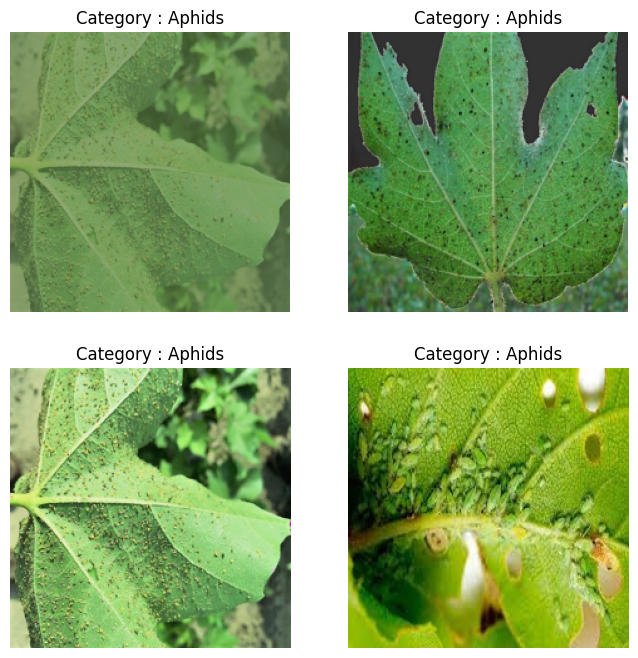

In [94]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Aphids.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")


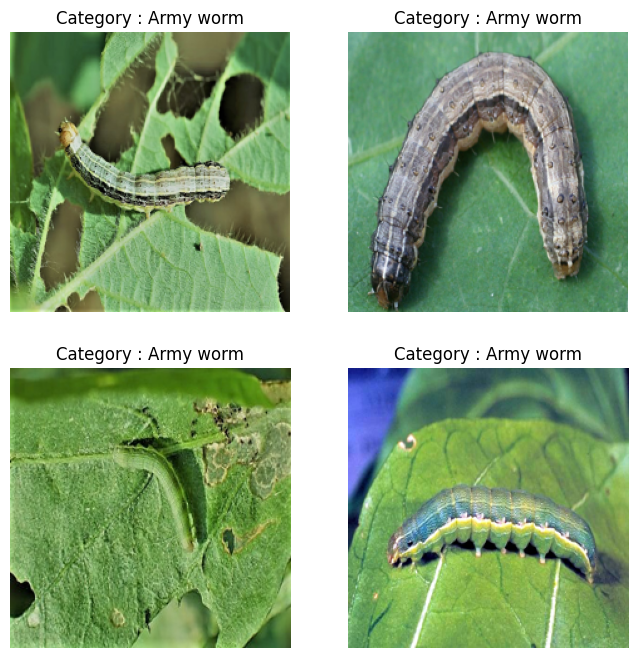

In [95]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Army_worm.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")

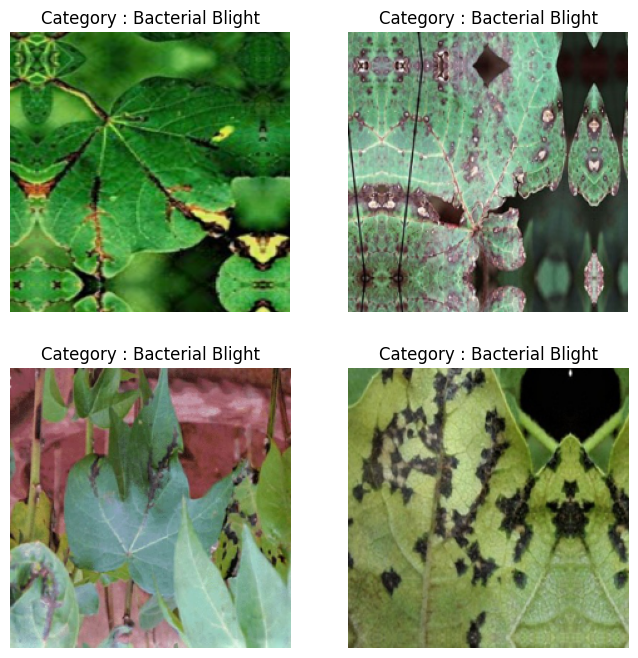

In [96]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Bacterial_blight.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")

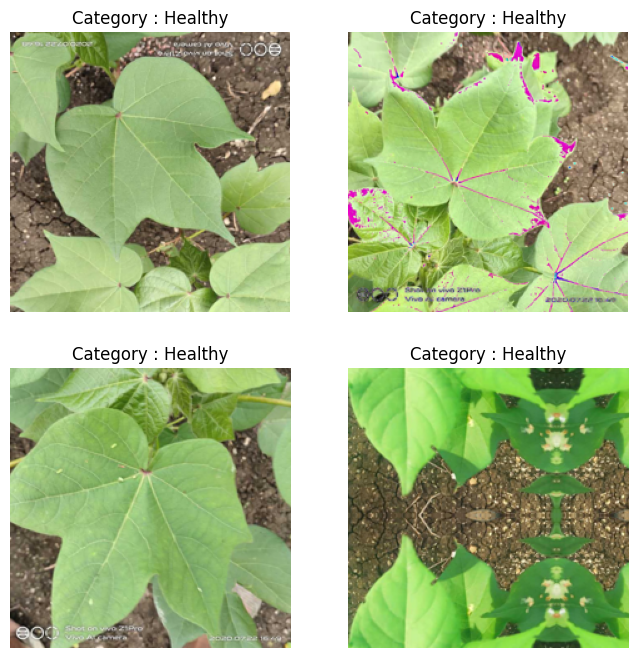

In [97]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Healthy.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")

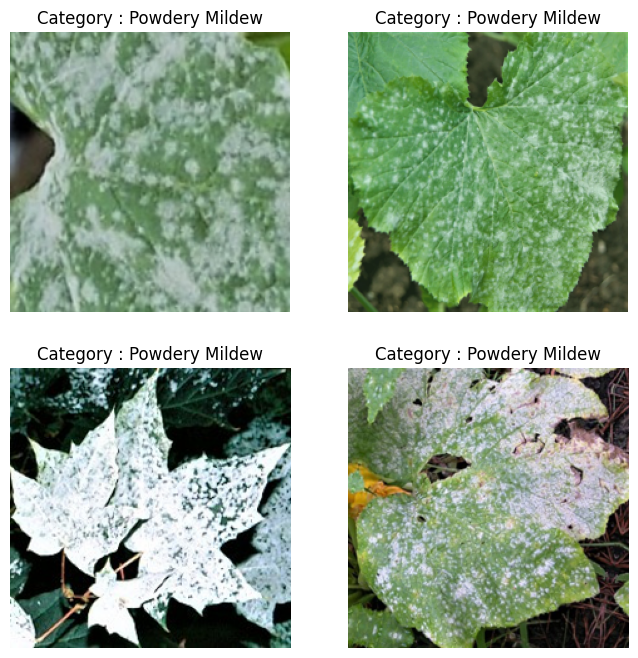

In [98]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Powdery_Mildew.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")

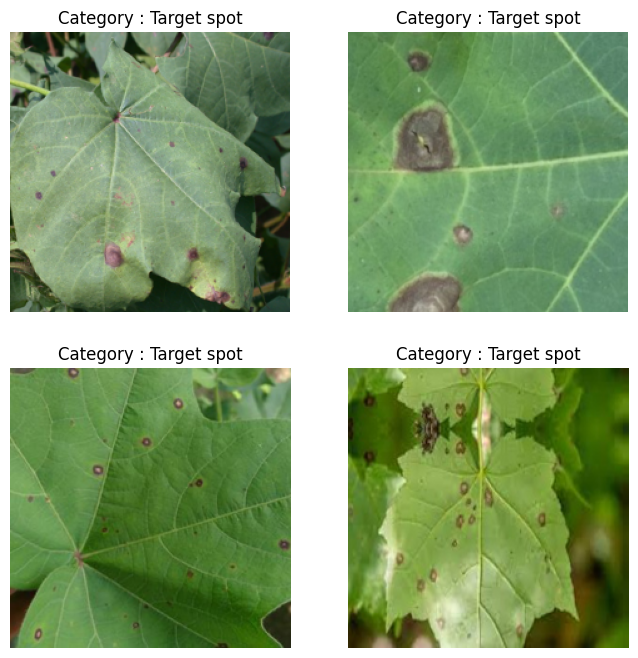

In [99]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
selected_rows = Target_spot.sample(n=4)



# iterate over the rows and display the images
for ax, (_, row) in zip(axes.flat, selected_rows.iterrows()):
    # convert the JPEG image to a numpy array
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
  
    # display the image
    ax.imshow(image_data)
    ax.axis('off')
    ax.set_title(f"Category : {row['CATEGORY']}")

In [104]:
## Image resizing
for index, row in Data.iterrows():
    # open the image
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
    # overwrite the original image with the resized image
    row['JPG'] = image_data

In [103]:
for index, row in Data_val.iterrows():
    # open the image
    image_data = np.array(row['JPG'])
    # resize the image
    image_data = np.array(Image.fromarray(image_data).resize((224, 224)))
    # overwrite the original image with the resized image
    row['JPG'] = image_data